Logistic Regression: Mean accuracy: 0.9791, Standard deviation: 0.0171
Decision Tree: Mean accuracy: 0.9153, Standard deviation: 0.0183
Random Forest: Mean accuracy: 0.9717, Standard deviation: 0.0267
Support Vector Machine: Mean accuracy: 0.9719, Standard deviation: 0.0141


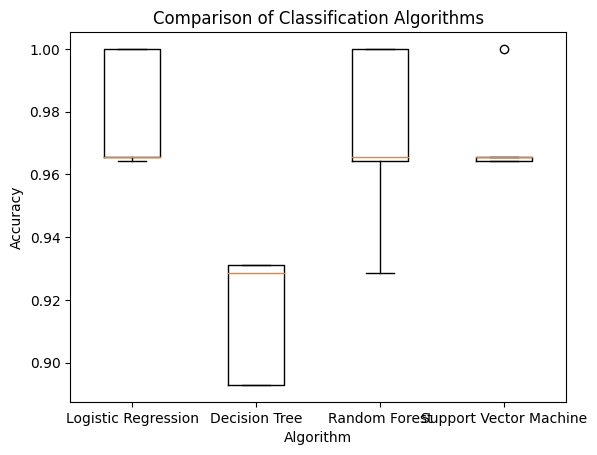

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
                "OD280/OD315 of diluted wines", "Proline"]
data = pd.read_csv(url, names=column_names)

# Split the data into features and target
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC())
]

# Evaluate models using cross-validation
results = []
names = []
for name, model in models:
    pipeline = Pipeline([
        ("scaler", StandardScaler()),  # Standardize features
        ("model", model)
    ])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    results.append(cv_scores)
    names.append(name)
    print(f"{name}: Mean accuracy: {cv_scores.mean():.4f}, Standard deviation: {cv_scores.std():.4f}")

# Compare model performance visually
import matplotlib.pyplot as plt
plt.boxplot(results, labels=names)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()
